1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + features_1
  + features_2
  + features_3
  
Are these features correlated?

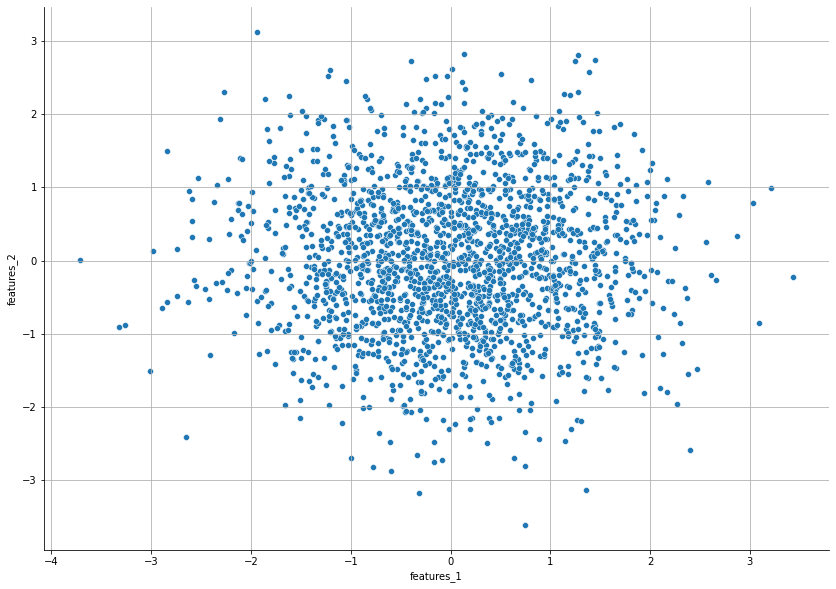

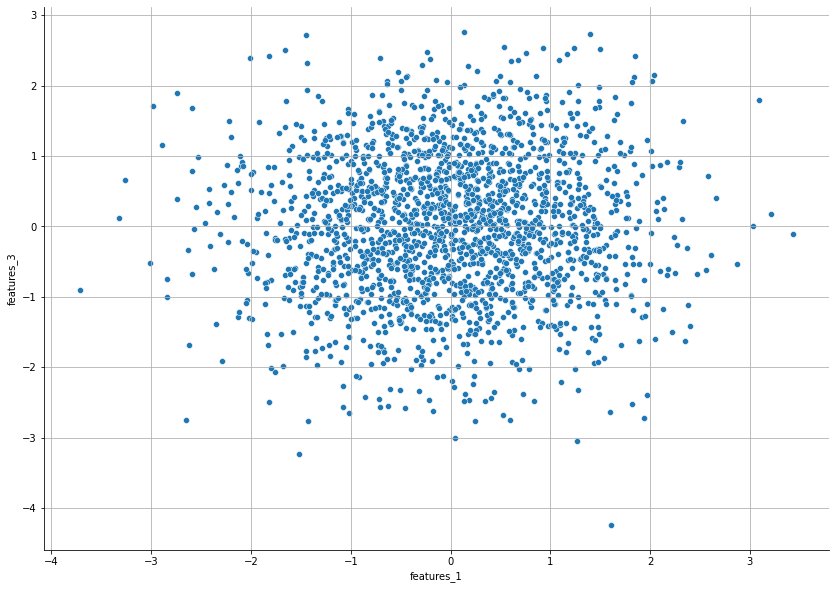

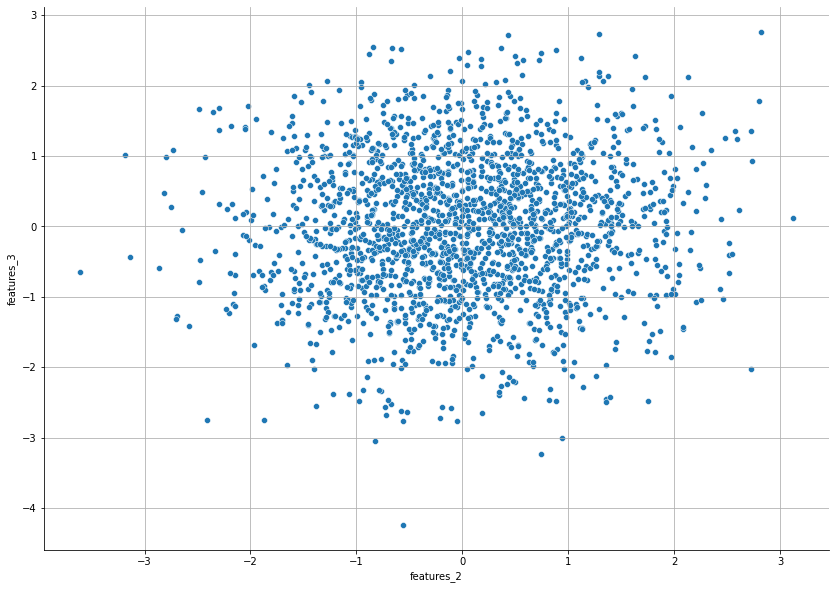

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#!wget https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
data=pd.read_csv('regression_generated.csv', header=0)

sns.relplot(x="features_1", y="features_2", data=data, height=8.27, aspect=11.7/8.27)
plt.grid()
sns.relplot(x="features_1", y="features_3", data=data, height=8.27, aspect=11.7/8.27)
plt.grid()
sns.relplot(x="features_2", y="features_3", data=data, height=8.27, aspect=11.7/8.27)
plt.grid()
plt.show()
#ANSWER: As can be seen from the figures the features are not correlated.

2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

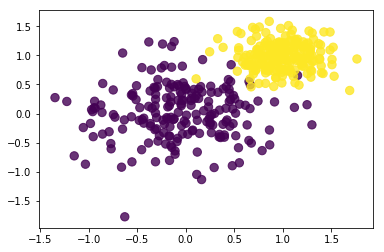

In [2]:
from IPython.display import Image
Image('images/two_categories_scatter_plot.png')

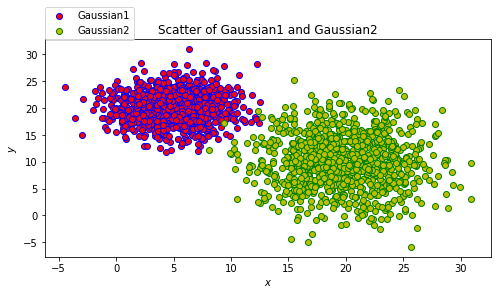

In [3]:
samples=1000

mu1 = [5, 20]
mu2 = [20, 10]

cov1=np.array([[7,0],[0,8]])
cov2=np.array([[15,0],[0,25]])

# calculate two 2D gaussian
gauss1=np.random.multivariate_normal(mu1,cov1,samples)
gauss2=np.random.multivariate_normal(mu2,cov2,samples)

# 2D Dataset
gauss1_s=pd.Series(map(lambda x:[x], gauss1)).apply(lambda x:x[0])
gauss2_s=pd.Series(map(lambda x:[x], gauss2)).apply(lambda x:x[0])
data=pd.DataFrame()
data['gaussian1']=gauss1_s
data['gaussian2']=gauss2_s

# plot it
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
x1=gauss1[:,0]
y1=gauss1[:,1]
ax1.scatter(x1, y1, marker='o', c='r', edgecolor='b', label='Gaussian1')
ax1.set_title('Scatter of Gaussian1 and Gaussian2')

x2=gauss2[:,0]
y2=gauss2[:,1]
ax1.scatter(x2, y2, marker='o', c='y', edgecolor='g', label='Gaussian2')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax1.legend(loc=(0.001, 0.999))
plt.show()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

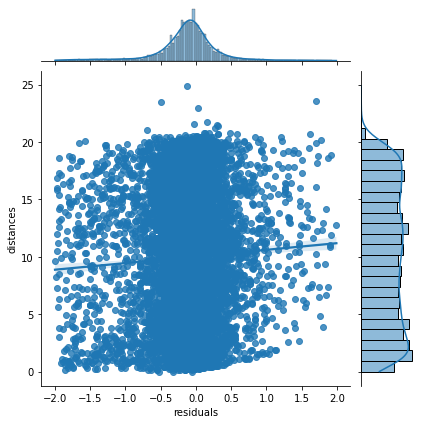

Bin centers:
 [ 0.56590909  1.69772727  2.82954545  3.96136364  5.09318182  6.225
  7.35681818  8.48863636  9.62045455 10.75227273 11.88409091 13.01590909
 14.14772727 15.27954545 16.41136364 17.54318182 18.675      19.80681818
 20.93863636 22.07045455 23.20227273 24.33409091]
Mean values of the "residuals":
 [-0.2171668  -0.15420775 -0.16874027 -0.1461103  -0.12072529 -0.12833655
 -0.07529175 -0.09271149 -0.10280142 -0.05488927 -0.0791701  -0.10803124
 -0.14311648 -0.14050352 -0.14308908 -0.15148122 -0.11665528 -0.03220906
  0.13152958  0.06333333  0.41285714 -0.12857143]
Standard deviation of the of the "residuals":
 [0.46849462 0.43474729 0.40478001 0.41456703 0.37642299 0.46550613
 0.43016038 0.42667919 0.41865394 0.4690617  0.46704286 0.49078801
 0.45279147 0.46625729 0.42997664 0.42179714 0.40938603 0.38944541
 0.46726498 0.13670731 1.15402844        nan]


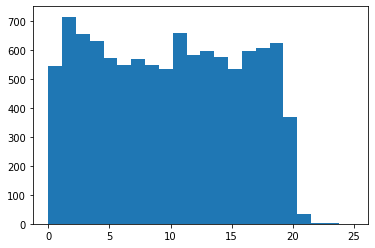

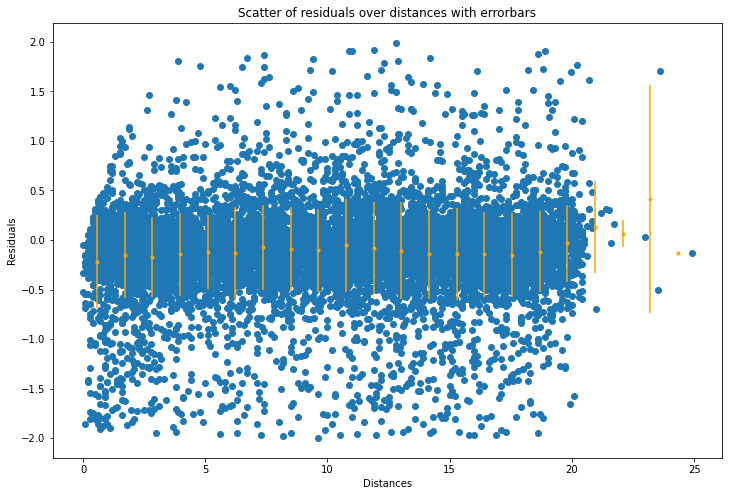

In [4]:
#!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/

filename='data/residuals_261.pkl'
dp=pd.read_pickle(filename).tolist()

d=pd.DataFrame()
d['residuals']=dp['residuals']
d['distances']=dp['distances']
d=d.query('abs(residuals)<2')

sns.jointplot(data=d,x='residuals',y='distances',kind='reg')
plt.show()

#ANSWER: As can be seen from the figures the features are not correlated.

# calculate bins using histogram plot
freq, bins, _ = plt.hist(d['distances'], bins=22)
#bin centers
x = 0.5*(bins[1:]+bins[:-1])
print('Bin centers:\n',x)

# calculate in which bin row belongs based on `distances`
d['bin'] = np.digitize(d['distances'], bins)

# groupby bin so we can calculate mean and std
binned = d.groupby('bin')

# calculate mean and standard error of residuals values in each bin
result = binned['residuals'].agg(['mean', 'std'])
y=np.array(result['mean'])
err_y=np.array(result['std'])
print('Mean values of the "residuals":\n',y)
print('Standard deviation of the of the "residuals":\n',err_y)

# plot it
fig=plt.figure(figsize=(12,8))
plt.scatter(x=d['distances'],y=d['residuals'])
plt.errorbar(x,y,yerr=err_y,ecolor='orange',fmt='.',color='orange')
ax=fig.axes[0]
ax.set_xlabel('Distances')
ax.set_ylabel('Residuals')
ax.set_title('Scatter of residuals over distances with errorbars')
plt.show()


4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


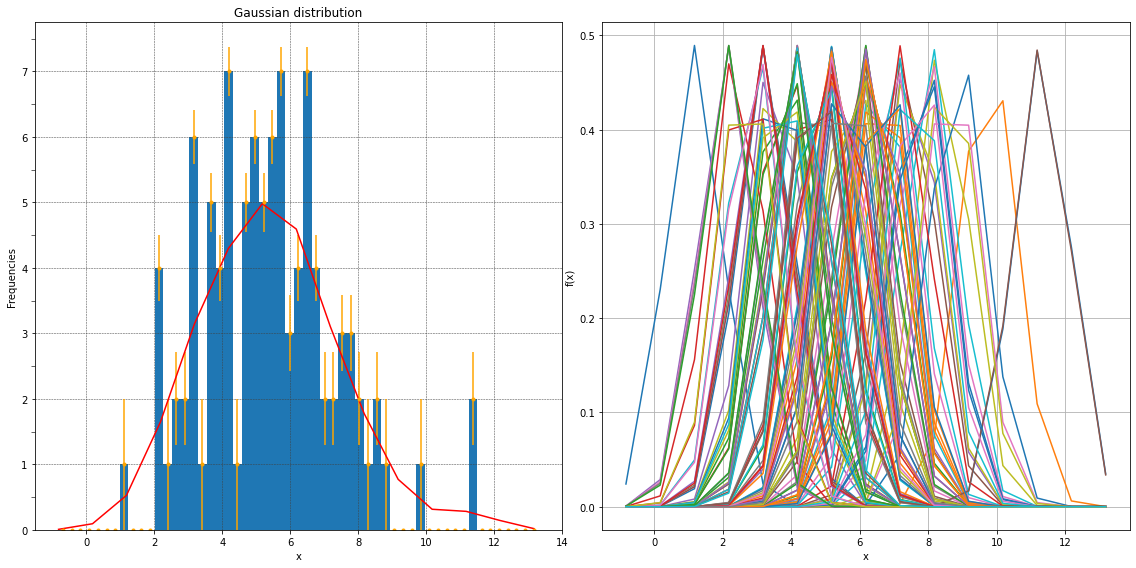

In [5]:
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
from scipy import integrate
from scipy.stats import norm

mu, sigma= 5, 2
N=100
x=np.random.normal(mu,sigma,N)

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

y, bins, _ = ax1.hist(x, bins=55, range=(x.min()-sigma,x.max()+sigma), density=False, cumulative=False)

ax1.set_title('Gaussian distribution')
ax1.set_xlabel('x')
ax1.set_ylabel('Frequencies')
# y axis major ticks
ax1.yaxis.set_minor_locator(AutoMinorLocator(2))
ax1.tick_params(which='minor', length=4)
ax1.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)
# calculate errors
bincenters = (bins[1:] + bins[:-1])/2

err_y= np.zeros(len(y))
for i in range(len(y)):
    if(y[i]==0):
        err_y[i]=0
    else:
        err_y[i]=1/np.sqrt(y[i])

ax1.errorbar(x=bincenters, y=y, yerr=err_y,ecolor='orange',fmt='.',color='orange')
fig.tight_layout()

ax2.set_xlabel('x')
ax2.set_ylabel('f(x)')
ax2.grid()
xrange = np.arange(x.min()-sigma,x.max()+sigma)
std_param = 1.06 * x.std() * (x.size ** -0.2)
gauss=[]
for i in range(len(x)):
    gauss_i=norm(loc=x[i],scale=std_param).pdf(xrange)
    ax2.plot(xrange,gauss_i)
    gauss.append(gauss_i)
    
bin_width = bins[1]-bins[0]
# integral of the original histogram
area=integrate.trapz(y, dx=bin_width)
# sum all the gaussian functions
gauss_sum=np.array(gauss).sum(axis=0)
# normalize the result
gauss_sum_normalized=gauss_sum/sum(gauss_sum)*area
# plot it
ax1.plot(xrange,gauss_sum_normalized,color='r')
plt.show()